## Assignment 02a - Linear Regression, Regularization and Polynomial Regression

Group:

*  Yannik Bucher
*  Dennis Imhof

### Using dataset: SkillCraft1 Master Table Dataset
[SkillCraft1 on UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset#)

### Assignments

Before performing the practical work, you need download the dataset accordingly to the option on your machine (or cloud service)
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set) with train_test_split method of Skikit Learn library

2. Using the scikit-learn library (http://scikit-learn.org/stable/), train the linear regression model for the training sample (example: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Check the accuracy of the model from the test set

4. Build a model using a polynomial function (example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Build plots with the dependence of the error on the degree of the polynomial function.

5. Build a model using regularization (example: http://scikit-learn.org/stable/modules/linear_model.html). On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error on the regularization coefficient.

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

In [83]:
df = pd.read_csv("data/SkillCraft1_Dataset.csv")
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [84]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [85]:
# No missing values in any of the columns
df.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
GameID                  3395 non-null int64
LeagueIndex             3395 non-null int64
Age                     3340 non-null float64
HoursPerWeek            3339 non-null float64
TotalHours              3338 non-null float64
APM                     3395 non-null float64
SelectByHotkeys         3395 non-null float64
AssignToHotkeys         3395 non-null float64
UniqueHotkeys           3395 non-null int64
MinimapAttacks          3395 non-null float64
MinimapRightClicks      3395 non-null float64
NumberOfPACs            3395 non-null float64
GapBetweenPACs          3395 non-null float64
ActionLatency           3395 non-null float64
ActionsInPAC            3395 non-null float64
TotalMapExplored        3395 non-null int64
WorkersMade             3395 non-null float64
UniqueUnitsMade         3395 non-null int64
ComplexUnitsMade        3395 non-null float64
ComplexAbilitiesUsed    3395 

In [89]:
# Though there were no None values in the dataset, closer inspection reveals missing values marked with "?"
# Convert the object-variables to numeric and set the missing values to None
def convert_to_numeric(series):
    series = series.apply(lambda x: None if x == "?" else x)
    series = pd.to_numeric(series)
    return series

columns = ["Age", "HoursPerWeek", "TotalHours"]
for col in columns:
    df[col] = convert_to_numeric(df[col])

df.loc[:, columns].apply(pd.isnull).sum()

Age             55
HoursPerWeek    56
TotalHours      57
dtype: int64

In [92]:
# Let's see if any predictors show a strong correlation with the response variable.
df.iloc[:,1:].corr().loc["LeagueIndex",:]

LeagueIndex             1.000000
Age                    -0.127825
HoursPerWeek            0.217976
TotalHours              0.023884
APM                     0.662309
SelectByHotkeys         0.490599
AssignToHotkeys         0.531125
UniqueHotkeys           0.351213
MinimapAttacks          0.312544
MinimapRightClicks      0.233231
NumberOfPACs            0.612192
GapBetweenPACs         -0.553246
ActionLatency          -0.673939
ActionsInPAC            0.143121
TotalMapExplored        0.220676
WorkersMade             0.295643
UniqueUnitsMade         0.133508
ComplexUnitsMade        0.148834
ComplexAbilitiesUsed    0.145733
Name: LeagueIndex, dtype: float64

In [177]:
# Throw out the rows with missing values
df_clean = df.dropna()

# Split the data into train and test set
train, test = train_test_split(df_clean, train_size=0.7)

# Select predictors that correlate with the response variable
predictors = ["APM", "SelectByHotkeys", "AssignToHotkeys", "GapBetweenPACs", "NumberOfPACs", "ActionLatency", "WorkersMade", "MinimapAttacks"]

In [203]:
def print_confusion_matrix(cm):
    plt.figure(figsize=(10,10))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True)
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.show()

def fit_model(model, plot=True):
    fit = model.fit(train[predictors], train["LeagueIndex"])
    pred = fit.predict(test[predictors])
    
    acc = (pred == test["LeagueIndex"]).mean()
    if plot:
        cm = confusion_matrix(test["LeagueIndex"], pred)
        print_confusion_matrix(cm)
    return acc

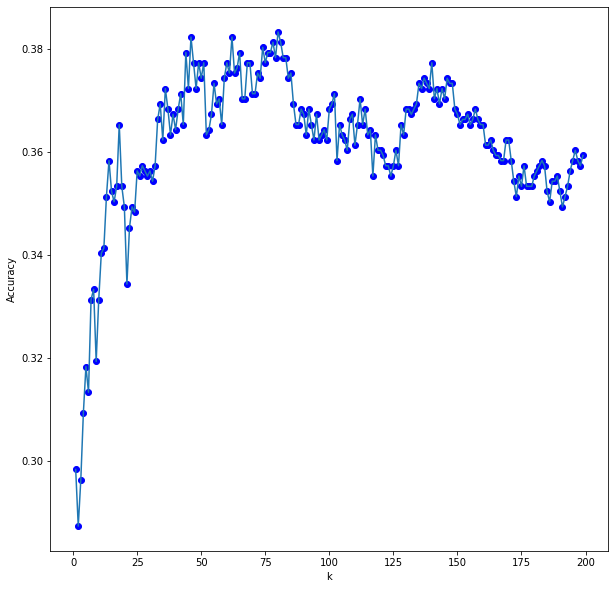

In [236]:
# Let's see how the accuracy varies by the number of neighbors k
ks = np.arange(1, 200, 1)
accuracy_scores = [fit_model(KNeighborsClassifier(n_neighbors=k, weights="uniform"), plot=False) for k in ks]



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(ks, accuracy_scores, 'bo')
plt.plot(ks, cubic_spline(ks))
ax.set_xlabel("k")
ax.set_ylabel("Accuracy")
plt.show()

0.3782435129740519


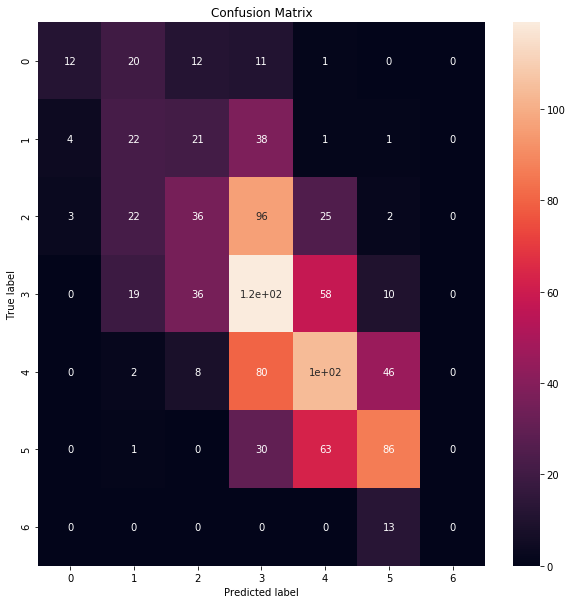

In [185]:
fit_model(LogisticRegressionCV(solver="sag", multi_class="multinomial", max_iter=200, cv=10))